In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [70]:
df = pd.read_csv("train_subset_1.csv");

/tmp/ipykernel_196/755688311.py:1: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train_subset_1.csv");


# First round of processing

In [71]:
# training_data = training_data[['CountryIdentifier', 'EngineVersion', 'AVProductsInstalled', 'SkuEdition', 'Firewall', 'OsBuild', 
#          'Census_MDC2FormFactor', 'Census_IsTouchEnabled', 'Wdft_IsGamer', 'Census_IsSecureBootEnabled', 
#          'Census_TotalPhysicalRAM','HasDetections']]

# training_data = training_data[['CountryIdentifier', 'AVProductsInstalled', 'SkuEdition', 'Firewall', 
#          'Census_MDC2FormFactor', 'Census_IsTouchEnabled', 'Wdft_IsGamer', 'Census_IsSecureBootEnabled', 
#          'Census_TotalPhysicalRAM','HasDetections']]

###### ALLLLLL FEATURES OF INTEREST #############
df = df[['EngineVersion', 'OsBuild', 'AVProductsInstalled','Firewall', 'Census_MDC2FormFactor', 
         'Census_IsTouchEnabled', 'Wdft_IsGamer', 'Census_IsSecureBootEnabled', 
         'Census_TotalPhysicalRAM','HasDetections', 'AvSigVersion','Census_HasOpticalDiskDrive']]

# df = df[['AVProductsInstalled', 'SkuEdition', 'Firewall', 
#          'Census_MDC2FormFactor', 'Census_IsTouchEnabled', 'Wdft_IsGamer', 'Census_IsSecureBootEnabled', 
#          'Census_TotalPhysicalRAM','HasDetections']]

In [72]:
df.dropna(inplace=True)
df.reset_index(inplace=True, drop=True)

In [73]:
training_data = df.copy()

In [74]:
# top_10_country = [43.0, 29.0, 141.0, 93.0, 171.0, 60.0, 201.0, 207.0, 66.0, 89.0]
# df['CountryIdentifier'] = df['CountryIdentifier'].apply(lambda x: x if x in top_10_country else 0)
# CountryIdentifier_mapping = {43.0: 'China', 29.0: 'United States', 141.0:'Japan', 93.0:'Brazil',
#                              171.0:'Germany', 60.0:'India', 201.0:'United Kingdom', 207.0:'France', 
#                              66.0:'Russia', 89.0:'Canada', 0:'Others'}
# df['CountryIdentifier'] = df['CountryIdentifier'].map(CountryIdentifier_mapping)

def EngineVersion_mapping(value):
    parts = str(value).split('.')
    #return int(parts[2][:-3])
    return int(parts[2])
training_data['EngineVersion'] = training_data['EngineVersion'].apply(EngineVersion_mapping)
training_data['EngineVersion']=training_data['EngineVersion'].astype(int)

def OsBuild_mapping(value):
    parts = str(value).split('.')
    # return int((parts[0])[:-3])
    return int((parts[0]))
training_data['OsBuild'] = training_data['OsBuild'].apply(OsBuild_mapping)
training_data['OsBuild']= training_data['OsBuild'].astype(int)

def AvSigVersion_mapping(value):
    parts = value.split('.')
    return parts[1]
training_data['AvSigVersion'] = training_data['AvSigVersion'].apply(AvSigVersion_mapping)
training_data['AvSigVersion']= training_data['AvSigVersion'].astype(int)

Census_MDC2FormFactor_mapping = {'Notebook': 'Laptop', 'Desktop': 'PC', 'Convertible':'Laptop', 
                       'Detachable':'Laptop', 'AllInOne': 'Laptop', 'PCOther': 'PC', 
                       'LargeTablet':'Tablet', 'SmallTablet':'Tablet', 'SmallServer;': 'Server',
                       'MediumServer': 'Server'}# 'LargeServer': 'Server', 'ServerOther':'Server'}
training_data['Census_MDC2FormFactor'] = training_data['Census_MDC2FormFactor'].map(Census_MDC2FormFactor_mapping)

In [75]:
# df['CountryIdentifier'] = df['CountryIdentifier'].astype('category')
training_data['Census_MDC2FormFactor'] = training_data['Census_MDC2FormFactor'].astype('category')
# training_data['SkuEdition'] = training_data['SkuEdition'].astype('category')

In [76]:
training_data.dropna(inplace=True)
training_data.reset_index(inplace=True, drop=True)

In [77]:
# Model
y = training_data['HasDetections']
X = training_data.drop(['HasDetections'], axis=1)
X_dummies = pd.get_dummies(X)

In [78]:
# dtree_model = tree.DecisionTreeClassifier()
# param_grid = {
#     'criterion': ['gini', 'entropy', 'logloss'],
#     'max_depth': [3, 5, 7, 10, 15],
#     'min_samples_split': [2, 5, 10, 20, 50],
#     'min_samples_leaf': [2, 4, 10, 20, 50]
# }

# grid_search = GridSearchCV(dtree_model, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
# grid_search.fit(X_dummies[0:150000], y[0:150000])

In [79]:
# best_params = grid_search.best_params_
# best_clf = grid_search.best_estimator_
# best_params

In [80]:
# df2 = training_data[['AVProductsInstalled','Firewall', 'Census_MDC2FormFactor', 
#          'Census_IsTouchEnabled', 'Wdft_IsGamer', 'Census_IsSecureBootEnabled', 
#          'HasDetections','Census_HasOpticalDiskDrive']]
training_data.rename(columns={"Census_IsSecureBootEnabled": "SecureBootEnabled", 
                    "Census_MDC2FormFactor": "MDC2FormFactor",
                    "Census_IsTouchEnabled": "TouchEnabled",
                    "Census_HasOpticalDiskDrive": "HasOpticalDiskDrive",
                    "Wdft_IsGamer": "IsGamer"}, inplace=True)
y = training_data['HasDetections']
X = training_data.drop(['HasDetections'], axis=1)
X_dummies = pd.get_dummies(X)

In [101]:
dtree_model = tree.DecisionTreeClassifier(
    criterion='gini',max_depth=5,min_samples_leaf=200,min_samples_split=500)
dtree_model.fit(X_dummies[0:10000], y[0:10000])

DecisionTreeClassifier(max_depth=5, min_samples_leaf=200, min_samples_split=500)

In [82]:
dt_feature_names = list(X_dummies.columns)

In [102]:
auc_grid = roc_auc_score(y[200000:250000], dtree_model.predict_proba(X_dummies[200000:250000])[:, 1])
print(f'AUC: {auc_grid}')

AUC: 0.6167905168157399


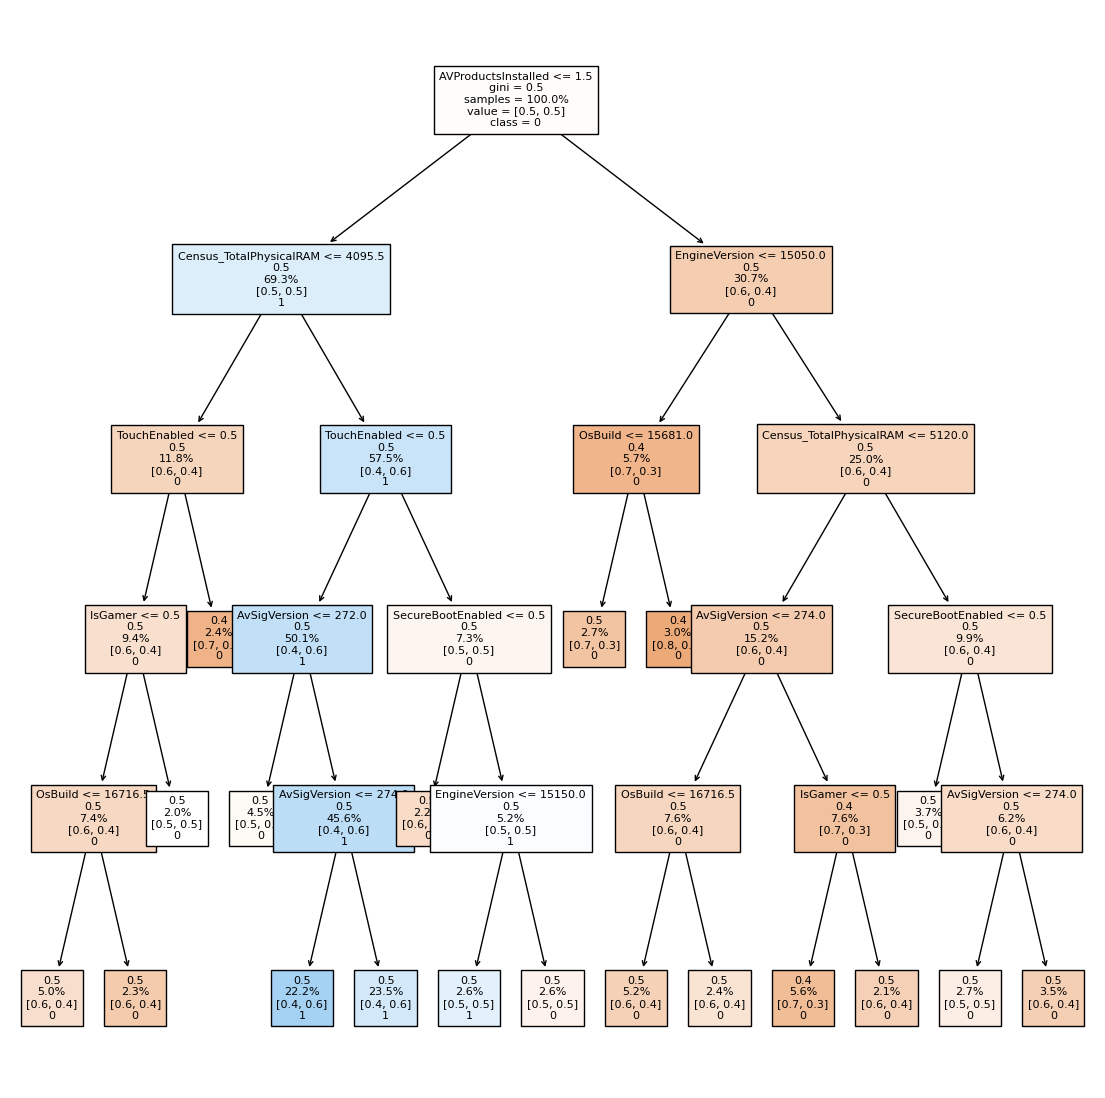

In [103]:
plt.figure(figsize=(14,14))
tree.plot_tree(dtree_model, class_names=['0', '1'],feature_names=dt_feature_names,
                     filled=True, rounded=False, fontsize=8, label='root', proportion=True,
                     precision=1)
plt.show()

In [85]:
X[0:100000].to_csv('X_train2.csv', index=False)
y[0:100000].to_csv('y_train2.csv', index=False)
X[200000:250000].to_csv('X_test2.csv', index=False)
y[200000:250000].to_csv('y_test2.csv', index=False)